<a href="https://colab.research.google.com/github/Leonardorochagit/Geracao_Energia/blob/main/3_Prophet_face_Geracao_AM_2018_a_2021_dia_SEM_OUTLIERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**📈 Time Series forecasting with Prophet**

image.png

In [1]:
from fbprophet import Prophet
import matplotlib.pyplot as plt


In [2]:
from fbprophet.plot import plot_plotly, plot_components_plotly
#import plotly.offline as py
#py.init_notebook_mode()

In [3]:
import plotly.io as pio
pio.renderers.default = "colab"

In [4]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from pandas import Grouper 
from pandas import DataFrame
from datetime import datetime

#ARIMA

#from pmdarima.arima import auto_arima
#Stats Models 
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

#Graficos 
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from matplotlib import pyplot
import seaborn as sns 

#Plotly Colab
import plotly.io as pio
pio.renderers.default = "colab"

#Prophert 
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

import warnings
warnings.filterwarnings("ignore")
#import warnings; warnings.filterwarnings(action='once')

#plt.rcParams["figure.figsize"] = (15,15)
large = 22; med = 16; small = 12; params = {'axes.titlesize': large, 'legend.fontsize': med, 'figure.figsize': (16, 10), 'axes.labelsize': med,
          'axes.titlesize': med, 'xtick.labelsize': med, 'ytick.labelsize': med,  'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.style.use('seaborn')
sns.set()
%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [5]:
#Importando os pacotes 
#https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Introdu%C3%A7%C3%A3o_ao_Plotly.ipynb#scrollTo=4NV0oNoMmLfw
#https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Introdu%C3%A7%C3%A3o_ao_Plotly.ipynb#scrollTo=tF4mhRnomRc7
# bibliotecas para trabalhar offline com a biblioteca
import plotly
import plotly.offline as py
import plotly.graph_objs as go # criará de fato os gráficos
#from plotly.offline import plot, iplot
#import cufflinks as cf # para conectar o plotly ao pandas
#cf.go_offline()
#plotly.offline.init_notebook_mode(connected = True)
#import plotly.io as pio
#pio.renderers

In [6]:
# lendo o dataset e criando um dataframe de series temporais: O arquivo está sem sem outliers 
df = pd.read_csv('https://raw.githubusercontent.com/Leonardorochagit/Geracao_Energia/main/Base_ONS/dataset_dfsout1.csv', delimiter=';', 
                  encoding = 'utf-8') #  index_col='Unnamed: 0',  skiprows=0, squeeze=True, parse_dates=False,engine='c'
df.head(-1)

,Data Dica,geracao
0,2018-01-01,18.118144
1,2018-01-02,17.801709
2,2018-01-03,17.267649
3,2018-01-04,17.303115
4,2018-01-05,17.672623
...,...,...
1455,2021-12-26,17.592541
1456,2021-12-27,21.742712
1457,2021-12-28,17.418880
1458,2021-12-29,16.949582


In [7]:
#del df['Unnamed: 0']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Data Dica  1461 non-null   object 
 1   geracao    1461 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


In [9]:
print (df.loc[df['geracao'] == 0])

Empty DataFrame
Columns: [Data Dica, geracao]
Index: []


In [10]:
df= df.rename(columns={'Data Dica':'data'})
df

,data,geracao
0,2018-01-01,18.118144
1,2018-01-02,17.801709
2,2018-01-03,17.267649
3,2018-01-04,17.303115
4,2018-01-05,17.672623
...,...,...
1456,2021-12-27,21.742712
1457,2021-12-28,17.418880
1458,2021-12-29,16.949582
1459,2021-12-30,17.836814


In [11]:
df.data = pd.to_datetime(df.data) #, format="%d/%m/%Y"
df

,data,geracao
0,2018-01-01,18.118144
1,2018-01-02,17.801709
2,2018-01-03,17.267649
3,2018-01-04,17.303115
4,2018-01-05,17.672623
...,...,...
1456,2021-12-27,21.742712
1457,2021-12-28,17.418880
1458,2021-12-29,16.949582
1459,2021-12-30,17.836814


In [12]:
print (df.loc[df['geracao'] == 0])

Empty DataFrame
Columns: [data, geracao]
Index: []


In [13]:
fig = px.line(df, x=df.data, y=df.geracao) 
fig.update_layout(autosize=True,width=1000, height=600)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

In [14]:
df_pro =df[['data', 'geracao']]
df_pro.columns=['ds', 'y']
df_pro.head(30)

,ds,y
0,2018-01-01,18.118144
1,2018-01-02,17.801709
2,2018-01-03,17.267649
3,2018-01-04,17.303115
4,2018-01-05,17.672623
5,2018-01-06,17.775895
6,2018-01-07,17.588197
7,2018-01-08,17.384383
8,2018-01-09,17.911597
9,2018-01-10,16.894557


In [15]:
df_teste=df_pro[(df_pro['ds']>='2021-01-01')]
df_teste

,ds,y
1096,2021-01-01,22.876548
1097,2021-01-02,24.640270
1098,2021-01-03,21.461506
1099,2021-01-04,23.420420
1100,2021-01-05,24.242198
...,...,...
1456,2021-12-27,21.742712
1457,2021-12-28,17.418880
1458,2021-12-29,16.949582
1459,2021-12-30,17.836814


In [16]:
print (df_teste.loc[df_teste['y'] == 0])

Empty DataFrame
Columns: [ds, y]
Index: []


In [17]:
fig = px.line(df_teste, x='ds', y="y") 
fig.update_layout(autosize=True,width=1000, height=600)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

In [18]:
df_treino=df_pro[(df_pro['ds']>='2018-01-01')& (df_pro['ds']<='2020-12-31')]
df_treino

,ds,y
0,2018-01-01,18.118144
1,2018-01-02,17.801709
2,2018-01-03,17.267649
3,2018-01-04,17.303115
4,2018-01-05,17.672623
...,...,...
1091,2020-12-27,22.889017
1092,2020-12-28,24.492370
1093,2020-12-29,24.524423
1094,2020-12-30,23.104828


In [19]:
# Add traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_treino.ds, y=df_treino.y,
                    mode='lines', name='Treino'), )

fig.add_trace(go.Scatter(x=df_teste.ds, y=df_teste.y,
                    mode='lines',name='Teste'))
#fig.add_trace(go.Scatter(x=dfmes_dt.index, y=dfmes_dt['variancia'],
#                    mode='lines',name='Variância', line = {'color': 'orange', 'dash': 'dot'}))
              
# Atualizando os eixos x
fig.update_xaxes( title_text = " Tempo (dias)", showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Atualizando os eixos y
fig.update_yaxes( title_text = "Geração de Energia (GWh)", showgrid=True, gridwidth=1,   gridcolor='lightgray',showline=True, linewidth=1, linecolor='black', range=[5,40])

# Adicionando o template
fig.update_layout(template = 'plotly_white') 
#legend
fig.update_layout(legend=dict(orientation="h", font = {'family': 'Arial','size': 10,'color': 'black'},
    yanchor="bottom", y=1, xanchor="right", x=0.9))

# Title 
fig.update_layout(title='Geração de Energia no Amazonas 2018 a 2021', title_x=0.5,title_y=0.93, plot_bgcolor = 'white',
font = {'family': 'Arial','size': 12,'color': 'black'},)

# Menu com seleção de periodo de analise
#fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(autosize=True,width=900, height=600) #Salvando e exibindo o grafico 
#fig.write_image("grafico.png") 
#Salvando e exibindo o grafico 
fig.update_layout(autosize=True,width=1500, height=800)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

In [20]:
#  ! pip install prophet[live]

In [21]:
m = Prophet(changepoint_prior_scale= 0.0005, seasonality_prior_scale=0.5,  daily_seasonality=True,) # Parameter "growth" should be "linear", "logistic" or "flat".Parameter "growth" should be "linear", "logistic" or "flat".
#m = Prophet(changepoint_prior_scale=0.006204765906220314,seasonality_prior_scale=2.1429563090768995, holidays_prior_scale=0.7814989008992034)
m.add_country_holidays(country_name = "BR")
m.add_seasonality(name='daily', period=90, fourier_order=8, mode='multiplicative')
m.train_holiday_names
#m.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='multiplicative')

In [22]:
m.fit(df_treino)

In [23]:
modelo=m.make_future_dataframe(periods=365, freq='D') #, 
modelo.head(-1)

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1455,2021-12-26
1456,2021-12-27
1457,2021-12-28
1458,2021-12-29


In [24]:
previsao=m.predict(modelo)
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(-1)

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,20.906435,16.856884,25.141343
1,2018-01-02,21.046815,17.179634,24.906890
2,2018-01-03,21.130563,17.048399,25.009713
3,2018-01-04,21.231068,16.981829,25.087112
4,2018-01-05,21.420072,17.483934,25.178983
...,...,...,...,...
1455,2021-12-26,27.229633,23.047955,31.431530
1456,2021-12-27,28.422261,24.344220,32.202769
1457,2021-12-28,28.631256,24.342429,32.589507
1458,2021-12-29,28.796302,24.728264,32.850873


In [25]:
previsao.to_csv(r'/content/prophet.csv', encoding = 'utf-8', sep =';', header=True, index=True) 

In [26]:
#https://linuxtut.com/en/13caf3e6224e31fdbe53/
fig = plot_plotly(m, previsao, trend=True, changepoints=True)
fig.update_layout(title="plpt_plotly")
fig.update_layout(autosize=True,width=1300, height=800)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

In [27]:
fig = plot_components_plotly(m, previsao) 
fig.update_layout(autosize=True,width=1300, height=800)
fig.update_layout(title="Componentes")
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

##Plot_components_plotly(m, forecast)# Create traces

In [28]:
#plot_components_plotly(m, forecast)# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_treino['ds'], y=df_treino['y'],
                    mode='lines', name='treino'))
fig.add_trace(go.Scatter(x=df_teste['ds'], y=df_teste['y'],
                    mode='lines', name='Teste'))
fig.add_trace(go.Scatter(x=previsao['ds'], y=previsao['yhat'],
                    mode='lines',
                    name='Predito'))

# Atualizando os eixos x
fig.update_xaxes( title_text = " Tempo ", showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Atualizando os eixos y
fig.update_yaxes( title_text = "Geração de Energia (GWh)", showgrid=True, gridwidth=1,   gridcolor='lightgray',showline=True, linewidth=1, linecolor='black', range=[5,40])

# Adicionando o template
fig.update_layout(template = 'plotly_white') 
#legend
fig.update_layout(legend=dict(orientation="h", font = {'family': 'Arial','size': 10,'color': 'black'},
    yanchor="bottom", y=1, xanchor="right", x=0.9))

# Title 
fig.update_layout(title='Geração Diária de Energia no Amazonas 2018 a 2021', title_x=0.5,title_y=0.93, plot_bgcolor = 'white',
font = {'family': 'Arial','size': 12,'color': 'black'},)

# Menu com seleção de periodo de analise
#fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(autosize=True,width=1200, height=900)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

In [29]:
dfc=DataFrame()
dfc['ds']=previsao['ds']
dfc['pred']=previsao['yhat']
dff=dfc.copy()
df2=dff[(dff['ds']>='2021-01-01')]
df2['actual']=df_teste.y 
df2

,ds,pred,actual
1096,2021-01-01,27.340374,22.876548
1097,2021-01-02,26.659581,24.640270
1098,2021-01-03,25.769286,21.461506
1099,2021-01-04,26.836171,23.420420
1100,2021-01-05,26.909645,24.242198
...,...,...,...
1456,2021-12-27,28.422261,21.742712
1457,2021-12-28,28.631256,17.418880
1458,2021-12-29,28.796302,16.949582
1459,2021-12-30,28.983647,17.836814


In [30]:
y_true = df2['actual']
y_pred = df2['pred']

In [31]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_true, y_pred)

0.09603863139604285

In [32]:
y_true = df2['actual']
y_pred = df2['pred']
from sklearn.metrics import mean_absolute_percentage_error
MAPE2=mean_absolute_percentage_error(y_true, y_pred)
print ("MAPE PROPHET = {:0.2f}%". format(MAPE2*100))

MAPE PROPHET = 9.60%


In [33]:
df2.to_csv(r'/content/prophet.csv', encoding = 'utf-8', sep =';', header=True, index=True) 

##**Performance**

In [34]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation

In [35]:
df_cv = cross_validation(m, initial='365 days', period='1 days', horizon = '730 days')
df_p = performance_metrics(df_cv)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-01-01 00:00:00 and 2019-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
df_cv.head(350)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-01-02,23.874608,21.005389,26.672082,20.340721,2019-01-01
1,2019-01-03,24.066984,21.235689,27.063444,20.509875,2019-01-01
2,2019-01-04,24.433260,21.484857,27.534136,20.188164,2019-01-01
3,2019-01-05,25.003855,22.099466,27.957204,25.425368,2019-01-01
4,2019-01-06,24.727847,21.820562,27.626042,25.853889,2019-01-01
...,...,...,...,...,...,...
345,2019-12-13,24.111280,20.941895,27.089627,29.033424,2019-01-01
346,2019-12-14,24.587329,21.583614,27.551903,28.919358,2019-01-01
347,2019-12-15,24.298720,21.259630,27.101698,28.990767,2019-01-01
348,2019-12-16,24.427283,21.553085,27.296056,27.975947,2019-01-01


In [37]:
dfcv=DataFrame()
dfcv['ds']=df_cv['ds']
dfcv['pred']=df_cv['yhat']
dfcv['actual']=df_cv['y']
dfcv

,ds,pred,actual
0,2019-01-02,23.874608,20.340721
1,2019-01-03,24.066984,20.509875
2,2019-01-04,24.433260,20.188164
3,2019-01-05,25.003855,25.425368
4,2019-01-06,24.727847,25.853889
...,...,...,...
725,2020-12-27,36.843912,22.889017
726,2020-12-28,37.178993,24.492370
727,2020-12-29,37.769032,24.524423
728,2020-12-30,38.224268,23.104828


In [38]:
y_true2 = dfcv['actual']
y_pred2 = dfcv['pred']

In [39]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_true2, y_pred2)

0.34170383669577153

In [40]:
#df_p = performance_metrics(df_cv)
df_p.head(-1)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,73 days,20.380974,4.514529,4.319246,0.217158,0.227495,0.109589
1,74 days,20.507752,4.528549,4.334713,0.218032,0.228885,0.109589
2,75 days,20.547037,4.532884,4.339953,0.218364,0.228885,0.109589
3,76 days,20.441416,4.521218,4.325787,0.217619,0.228885,0.109589
4,77 days,20.771088,4.557531,4.387462,0.220922,0.232594,0.095890
...,...,...,...,...,...,...,...
652,725 days,79.509182,8.916792,8.595710,0.332381,0.314984,0.000000
653,726 days,78.357404,8.851972,8.558135,0.330266,0.314984,0.000000
654,727 days,78.070198,8.835734,8.547162,0.329876,0.314984,0.000000
655,728 days,79.059676,8.891551,8.589443,0.332282,0.314984,0.000000


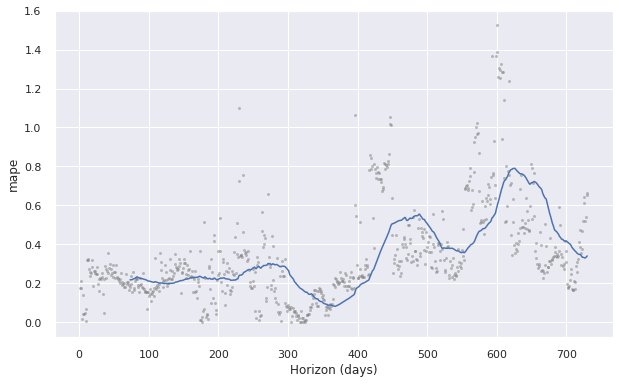

In [41]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

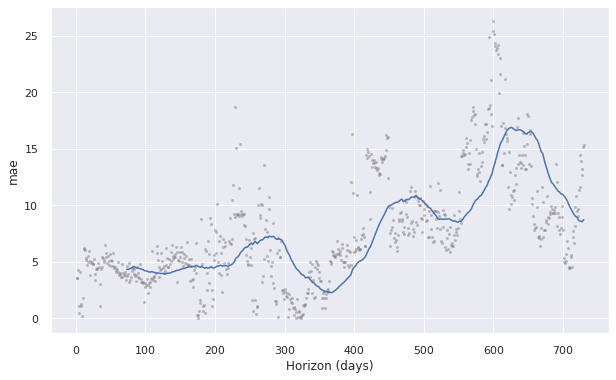

In [42]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

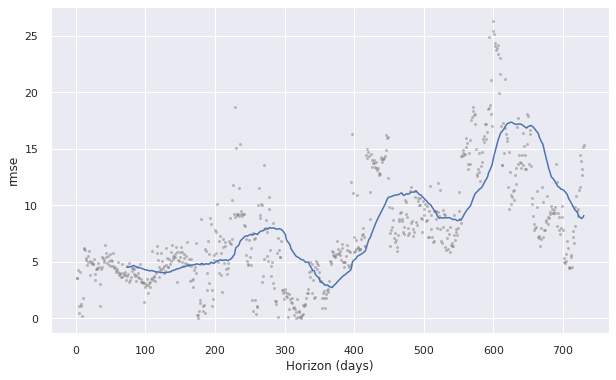

In [43]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [44]:
#plot_components_plotly(m, forecast)# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_treino['ds'], y=df_treino['y'],
                    mode='lines', name='Real'))
fig.add_trace(go.Scatter(x=df_teste['ds'], y=df_teste['y'],
                    mode='lines', name='Real'))
fig.add_trace(go.Scatter(x=previsao['ds'], y=previsao['yhat'],
                    mode='lines',
                    name='Predito'))

# Atualizando os eixos x
fig.update_xaxes( title_text = " Tempo", showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Atualizando os eixos y
fig.update_yaxes( title_text = "Geração de Energia (GWh)", showgrid=True, gridwidth=1,   gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Adicionando o template
fig.update_layout(template = 'plotly_white') 
#legend
fig.update_layout(legend=dict(orientation="h", font = {'family': 'Arial','size': 10,'color': 'black'},
    yanchor="bottom", y=1, xanchor="right", x=0.9))

# Title 
fig.update_layout(title='Geração Diária de Energia no Amazonas 2018 a 2021', title_x=0.5,title_y=0.93, plot_bgcolor = 'white',
font = {'family': 'Arial','size': 12,'color': 'black'},)

# Menu com seleção de periodo de analise
#fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(autosize=True,width=1500, height=800)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

## **Hyperparameter tuning**

In [45]:
#https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning
# Python
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 2, 5, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_treino)  # Fit model with given params
    df_cv = cross_validation(m, initial='730 days', period='365 days', horizon='365 days', parallel="processes") #, cutoffs=cutoffs
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['MAE'] = rmses
print(tuning_results)
#tuning_results.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fa4d7dcc750>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fa583564950>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fa4cf8624d0>
INFO:fbprophet:Disabling daily seasonality. Run prop

    changepoint_prior_scale  seasonality_prior_scale        MAE
0                     0.001                     0.01   4.892433
1                     0.001                     0.10   4.931307
2                     0.001                     1.00   4.934904
3                     0.001                     2.00   4.936883
4                     0.001                     5.00   4.935690
5                     0.001                    10.00   4.935746
6                     0.010                     0.01   5.546911
7                     0.010                     0.10   5.373077
8                     0.010                     1.00   5.372636
9                     0.010                     2.00   5.372517
10                    0.010                     5.00   5.371701
11                    0.010                    10.00   5.371703
12                    0.100                     0.01  13.721036
13                    0.100                     0.10  17.752361
14                    0.100             

In [46]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}


In [47]:
# Python
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_treino)  # Fit model with given params
    #df_cv = cross_validation(m,  horizon='365 days', parallel="processes")#cutoffs=cutoffs, 
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['mae'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

    changepoint_prior_scale  seasonality_prior_scale       rmse
0                     0.001                     0.01   3.770650
1                     0.001                     0.10   3.738187
2                     0.001                     1.00   3.740852
3                     0.001                    10.00   3.742115
4                     0.010                     0.01   4.442056
5                     0.010                     0.10   4.188883
6                     0.010                     1.00   4.187689
7                     0.010                    10.00   4.186805
8                     0.100                     0.01  12.873262
9                     0.100                     0.10  16.446387
10                    0.100                     1.00  16.236740
11                    0.100                    10.00  16.145451
12                    0.500                     0.01  12.132302
13                    0.500                     0.10   4.701916
14                    0.500             

In [48]:
# Python
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1}
